In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from scipy import stats
import datetime as dt
from datetime import timedelta

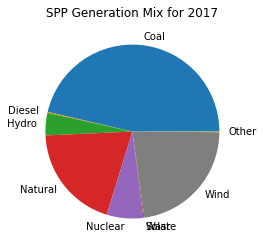

In [2]:
gen_mix = pd.read_csv(
    r'C:\Users\felip\Desktop\Electricity\Energy Market\Energy Market (SPP)\Generation Mix By Fuel Type\GenMix_2017.csv')

new = pd.DataFrame()

first = gen_mix.columns.values.tolist()[1].split(' ')[1]
new[first] = np.array([gen_mix[gen_mix.columns.values.tolist()[1]].sum()])
for element in gen_mix.columns.values.tolist()[2:]:
    if element.split(' ')[1] == first:
        new[first] = new[first] + np.array([gen_mix[element].sum()])
    else:
        new[element.split(' ')[1]] = np.array([gen_mix[element].sum()])
        first = element.split(' ')[1]

output = new.loc[0].values.tolist()[0:-1]
fuels = new.columns.values.tolist()[0:-1]

plt.pie(output,labels=fuels)
plt.title('SPP Generation Mix for 2017')
plt.show()

In [3]:
def GMT2CT(s):
    date = s.split('T')[0]
    date = dt.datetime.strptime(date,'%Y-%m-%d').date()
    time = s.split('T')[1][:-1]
    hour = int(time.split(':')[0])
    if hour >= 6:
        hour = hour - 6
    else:
        hour = 24 + (hour - 6)
        date = date - timedelta(1)
    time = str(hour) + ':' + time.split(':')[1] + ':' + time.split(':')[2]
    time = dt.datetime.strptime(time,'%H:%M:%S').time()
    return [date, time]


In [4]:
list_intervals = gen_mix[gen_mix.columns[0]].values.tolist()
local_time = []
local_date = []
for value in list_intervals:
    local_date.append(GMT2CT(value)[0])
    local_time.append(GMT2CT(value)[1])
gen_mix['Local Date'] = np.array(local_date)
gen_mix['Local Time'] = np.array(local_time)

In [6]:
gen_mix.head()

,GMT MKT Interval,Coal Market,Coal Self,Diesel Fuel Oil,Hydro,Natural Gas,Nuclear,Solar,Waste Disposal Services,Wind,Waste Heat,Other,Average Actual Load,Local Date,Local Time
0,2017-01-01T06:00:00Z,2956.2,13385.3,0.0,251.8,3025.9,2098.4,0.0,7.7,4499.1,0.0,35.4,25380.548,2017-01-01,00:00:00
1,2017-01-01T06:05:00Z,2920.2,13342.3,0.0,241.7,2988.6,2100.8,0.0,8.1,4529.3,0.0,35.7,25356.102,2017-01-01,00:05:00
2,2017-01-01T06:10:00Z,2920.2,13254.2,0.0,241.7,2969.2,2100.8,0.0,8.1,4529.3,0.0,35.7,25356.102,2017-01-01,00:10:00
3,2017-01-01T06:15:00Z,2923.2,13380.3,0.0,267.6,2981.2,2099.1,0.0,8.1,4551.8,0.0,35.7,25358.945,2017-01-01,00:15:00
4,2017-01-01T06:20:00Z,2900.3,13388.1,0.0,276.7,2960.1,2099.8,0.0,8.7,4603.1,0.0,36.4,25345.252,2017-01-01,00:20:00


<ErrorbarContainer object of 3 artists>

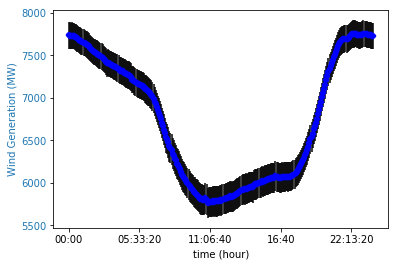

In [64]:
data1 = gen_mix.groupby('Local Time')[[' Wind']].mean()

data1['sem'] = gen_mix.groupby('Local Time')[[' Wind']].sem()

time = data1.index

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('time (hour)')
ax1.set_ylabel('Wind Generation (MW)', color=color)
ax1.plot(time, data1[' Wind'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.errorbar(time,data1[' Wind'], data1['sem'],
                 marker='x', ecolor='black',mec='blue', linestyle='None',ms=4, mew=4, label=None)

In [7]:
DA = pd.read_csv(r'C:\Users\felip\Desktop\Electricity\Energy Market\Energy Market (SPP)\DA\2017\2017\LMP_SL_2017.csv')
DA.head()

,INTERVAL,GMTINTERVALEND,STLMNTLOCNAME,PNODENAME,LMP,MLC,MCC,MEC
0,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,AEC,SOUC,23.6810,0.2235,-0.0405,23.4980
1,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,AECC_CSWS,CSWS_AECC_LA,24.7412,0.8705,0.3727,23.4980
2,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,AECC_ELKINS,CSWSELKINSUNELKINS_RA,25.4095,1.1575,0.7541,23.4979
3,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,AECC_FITZHUGH,CSWSFITZHUGHPLT1,25.2253,1.0222,0.7052,23.4979
4,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,AECC_FLTCREEK,CSWSFLINTCRKUN1_JOU_AECC_RA,24.7430,0.5142,0.7309,23.4979


In [19]:
# Iterates through every location (more granular, but slower)
DA_intervals = DA[DA.columns[0]].values.tolist()
DA_dates = []
DA_hours = []
for interval in DA_intervals:
    date = interval.split(' ')[0]
    DA_dates.append(dt.datetime.strptime(date,'%Y-%m-%d').date())
    hour = interval.split(' ')[1].split('.')[0]
    DA_hours.append(dt.datetime.strptime(hour,'%H:%M:%S').time())
DA['Local Date'] = np.array(DA_dates)
DA['Local Time'] = np.array(DA_hours)
DA.head()

,INTERVAL,GMTINTERVALEND,STLMNTLOCNAME,PNODENAME,LMP,MLC,MCC,MEC,Local Date,Local Time
0,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,AEC,SOUC,23.6810,0.2235,-0.0405,23.4980,2017-01-01,01:00:00
1,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,AECC_CSWS,CSWS_AECC_LA,24.7412,0.8705,0.3727,23.4980,2017-01-01,01:00:00
2,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,AECC_ELKINS,CSWSELKINSUNELKINS_RA,25.4095,1.1575,0.7541,23.4979,2017-01-01,01:00:00
3,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,AECC_FITZHUGH,CSWSFITZHUGHPLT1,25.2253,1.0222,0.7052,23.4979,2017-01-01,01:00:00
4,2017-01-01 01:00:00.000000,2017-01-01 07:00:00.000000,AECC_FLTCREEK,CSWSFLINTCRKUN1_JOU_AECC_RA,24.7430,0.5142,0.7309,23.4979,2017-01-01,01:00:00


In [28]:
# Aggregate locations
DA_aggloc = DA.groupby('GMTINTERVALEND')[['INTERVAL','LMP']].agg({'INTERVAL':'first',
                                                                  'LMP':'mean'})
DA_aggloc['loc sem'] = DA.groupby('GMTINTERVALEND')[['LMP']].sem()

In [58]:
DA_intervals = DA_aggloc[DA_aggloc.columns[0]].values.tolist()
DA_dates = []
DA_times = []
weekday = []
for interval in DA_intervals:
    date = interval.split(' ')[0]
    date = dt.datetime.strptime(date,'%Y-%m-%d').date()
    DA_dates.append(date)
    if date.weekday() < 5:
        weekday.append(True)
    else:
        weekday.append(False)
    time = interval.split(' ')[1].split('.')[0]
    time = dt.datetime.strptime(hour,'%H:%M:%S').time()
    DA_times.append(time)
DA_aggloc['Local Date'] = np.array(DA_dates)
DA_aggloc['Local Time'] = np.array(DA_times)
DA_aggloc['Weekday'] = np.array(weekday)
DA_aggloc.head()

,INTERVAL,LMP,loc sem,Local Date,Local Time,time sem,Weekday
GMTINTERVALEND,,,,,,,
2017-01-01 07:00:00.000000,2017-01-01 01:00:00.000000,21.983863,0.192730,2017-01-01,00:00:00,NaN,False
2017-01-01 08:00:00.000000,2017-01-01 02:00:00.000000,20.761607,0.189245,2017-01-01,00:00:00,NaN,False
2017-01-01 09:00:00.000000,2017-01-01 03:00:00.000000,19.944763,0.216253,2017-01-01,00:00:00,NaN,False
2017-01-01 10:00:00.000000,2017-01-01 04:00:00.000000,20.188906,0.253526,2017-01-01,00:00:00,NaN,False
2017-01-01 11:00:00.000000,2017-01-01 05:00:00.000000,20.363023,0.253978,2017-01-01,00:00:00,NaN,False


<ErrorbarContainer object of 3 artists>

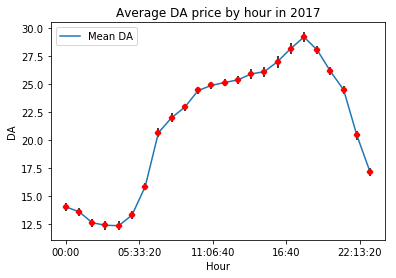

In [49]:
DA_price = DA_aggloc.groupby('Local Time')[['LMP']].mean()
DA_price['time sem'] = DA_aggloc.groupby('Local Time')[['LMP']].sem()
time_x = DA_price.index

plt.plot(time_x,DA_price['LMP'],label='Mean DA')
plt.xlabel('Hour')
plt.ylabel('DA')
plt.title('Average DA price by hour in 2017')
plt.legend(loc='best')
plt.errorbar(time_x,DA_price['LMP'], DA_price['time sem'],
             marker='x', ecolor='black',mec='red', linestyle='None',ms=4, mew=4)


In [ ]:
def plot